In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [94]:
# Obtain Stock Data
stock_list = ["AAPL", "BRK-B", "RITM", "JPM", "MSFT", "FRC", "ULST", "BABA", "AMZN", "BAC", "KO", 
              "KHC", "GM", "MCO", "GE", "BKR", "HPQ", "CVX", "JNJ", "KR", "MA", "T"]

stocks_data = pd.DataFrame()

for i in stock_list:
    stock = yf.download(i, start = "2022-03-31", end = "2023-03-31")
    stocks_data[f"{i}"] = stock["Adj Close"]

stocks_data = stocks_data.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot: >

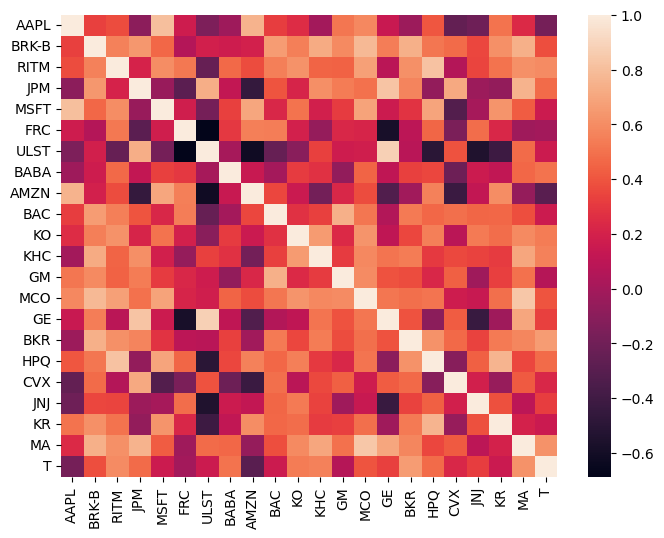

In [209]:
# Check the Correlation

corr = stocks_data.corr()
figure(figsize = (8, 6))
sns.heatmap(corr, annot = False, fmt = "g")

In [189]:
stock_1 = "MCO"
stock_2 = "MA"

In [190]:
stock_data = stocks_data[["Date", stock_1, stock_2]]

stock_data.corr()

,MCO,MA
MCO,1.000000,0.839744
MA,0.839744,1.000000


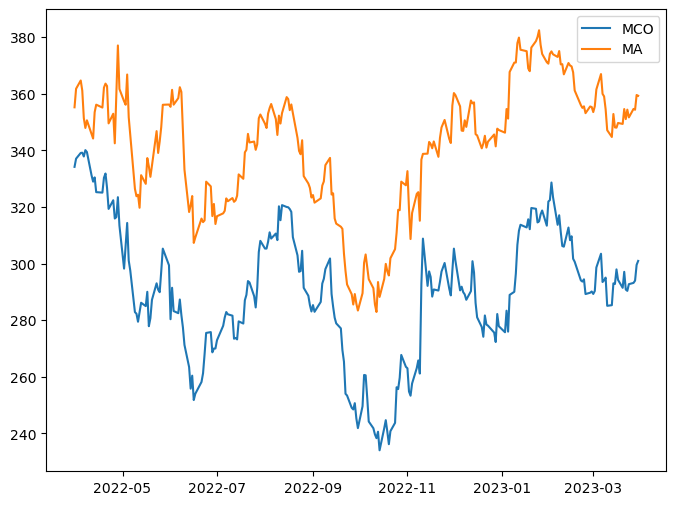

In [208]:
# Plot the Data
figure(figsize = (8, 6))

plt.plot(stock_data["Date"], stock_data[[stock_1, stock_2]])
plt.legend([stock_1, stock_2])
plt.show()

/var/folders/_b/554mn6jx1vv8940qhs9gysv80000gn/T/ipykernel_90485/2277811607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Spread"] = stock_data[f"{stock_1}"] - stock_data[f"{stock_2}"]


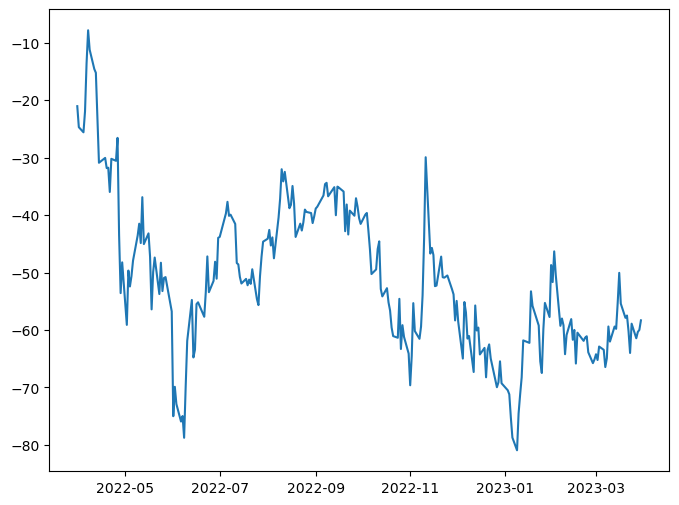

In [210]:
# Compute Spread and Plot Spread

stock_data["Spread"] = stock_data[f"{stock_1}"] - stock_data[f"{stock_2}"]

figure(figsize = (8, 6))
plt.plot(stock_data["Date"], stock_data["Spread"])
plt.show()

/var/folders/_b/554mn6jx1vv8940qhs9gysv80000gn/T/ipykernel_90485/2442415400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Ratio"] = stock_data[stock_1] / stock_data[stock_2]


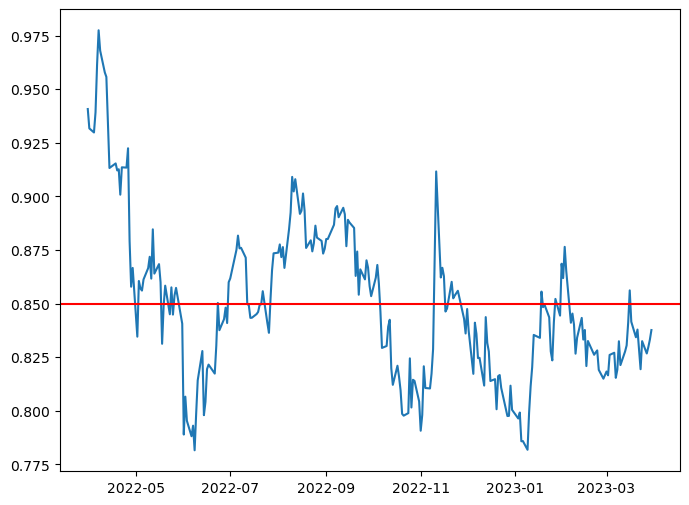

In [211]:
# Plot the Price Ratio

stock_data["Ratio"] = stock_data[stock_1] / stock_data[stock_2]

figure(figsize = (8, 6))
plt.plot(stock_data["Date"], stock_data["Ratio"])
plt.axhline(stock_data["Ratio"].mean(), color = "r")
plt.show()

In [194]:
# Check the Co-integration
result = ts.coint(stock_data[stock_1], stock_data[stock_2])

if result[1] < 0.05: 
    print(f"The p-value is {result[1]}. The cointegration test passes.")
else:
    print(f"The p-value is {result[1]}. The cointegration test does not pass.\nTry other tests.")

The p-value is 0.09099534235581219. The cointegration test does not pass.
Try other tests.


In [201]:
# Check the ADF test
stock1_ADF = adfuller(stock_data[stock_1])
stock2_ADF = adfuller(stock_data[stock_2])
Spread_ADF = adfuller(stock_data["Spread"])
Ratio_ADF = adfuller(stock_data["Ratio"])
print(f"The p-value for the ADF Test of {stock_1} is {stock1_ADF[1]}")
print(f"The p-value for the ADF Test of {stock_2} is {stock2_ADF[1]}")

if Spread_ADF[1] < 0.05:
    print(f"The p-value for the ADF Test of Spread is {Spread_ADF[1]}. \n Passes.")
    if Ratio_ADF[1] < 0.05: 
        print(f"The p-value for the ADF Test of Ratio is {Ratio_ADF[1]}. \n Passes.")
        if Spread_ADF[1] <= Ratio_ADF[1]:
            print("Use Spread for modelling.")
            Criterion = "Spread"
        else:
            print("Use Ratio for modelling.")
            Criterion = "Ratio"
    else: 
        print(f"The p-value for the ADF Test of Ratio is {Ratio_ADF[1]}. \n Fails.")
        print("Use Spread for modelling.")
        Criterion = "Spread"
else: 
    print(f"The p-value for the ADF Test of Spread is {Spread_ADF[1]}. \n Fails.")
    if Ratio_ADF[1] < 0.05: 
        print(f"The p-value for the ADF Test of Ratio is {Ratio_ADF[1]}. \n Passes.")
        print("Use Ratio for modelling.")
        Criterion = "Ratio"
    else: 
        print(f"The p-value for the ADF Test of Ratio is {Ratio_ADF[1]}. \n Fails.")
        print("Both fails the test.\nTry another pair of stocks")

The p-value for the ADF Test of MCO is 0.11275664381989964
The p-value for the ADF Test of MA is 0.2485399726158264
The p-value for the ADF Test of Spread is 0.040245810483676474. 
 Passes.
The p-value for the ADF Test of Ratio is 0.029271061290794754. 
 Passes.
Use Ratio for modelling.


/var/folders/_b/554mn6jx1vv8940qhs9gysv80000gn/T/ipykernel_90485/2380874293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[f"{Criterion}_Z"] = (stock_data[f"{Criterion}"] - stock_data[f"{Criterion}"].mean()) / stock_data[f"{Criterion}"].std()


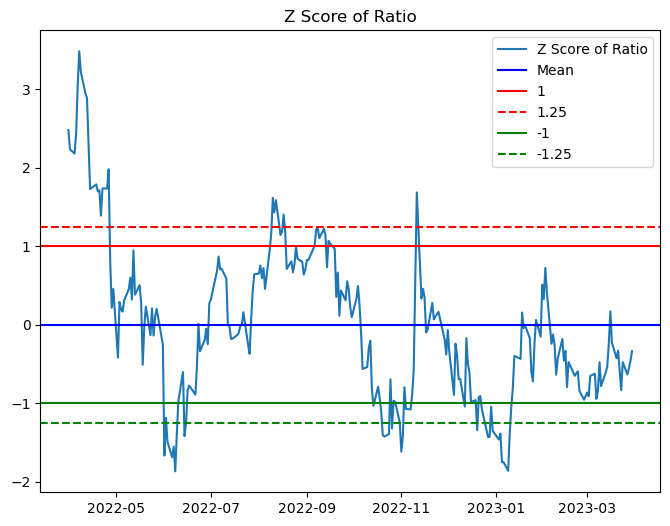

In [212]:
# Turn data into zscore
stock_data[f"{Criterion}_Z"] = (stock_data[f"{Criterion}"] - stock_data[f"{Criterion}"].mean()) / stock_data[f"{Criterion}"].std()

figure(figsize = (8, 6))
plt.plot(stock_data["Date"], stock_data[f"{Criterion}_Z"])
plt.axhline(stock_data[f"{Criterion}_Z"].mean(), color = "b")
plt.axhline(1.0, color = "r")
plt.axhline(1.25, color = "r", linestyle = "--")
plt.axhline(-1.0, color = "g")
plt.axhline(-1.25, color = "g", linestyle = "--")
plt.legend([f"Z Score of Ratio", "Mean", 1, 1.25, -1, -1.25])
plt.title(f"Z Score of {Criterion}")
plt.show()

/var/folders/_b/554mn6jx1vv8940qhs9gysv80000gn/T/ipykernel_90485/1222187982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[f"{Criterion}_mavg5"] = stock_data[f"{Criterion}"].rolling(window = 5, center = False).mean()
/var/folders/_b/554mn6jx1vv8940qhs9gysv80000gn/T/ipykernel_90485/1222187982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[f"{Criterion}_mavg20"] = stock_data[f"{Criterion}"].rolling(window = 20, center = False).mean()
/var/folders/_b/554mn6jx1vv8940qhs9gysv80000

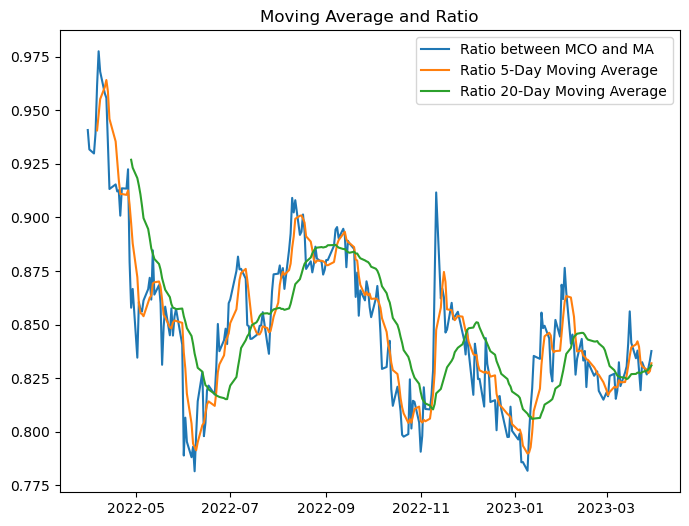

In [213]:
# Compute Moving Average
stock_data[f"{Criterion}_mavg5"] = stock_data[f"{Criterion}"].rolling(window = 5, center = False).mean()
stock_data[f"{Criterion}_mavg20"] = stock_data[f"{Criterion}"].rolling(window = 20, center = False).mean()
stock_data["std_20"] = stock_data[f"{Criterion}"].rolling(window = 20, center = False).std()
stock_data["zscore_20_5"] = (stock_data[f"{Criterion}_mavg5"] - stock_data[f"{Criterion}_mavg20"]) / stock_data["std_20"]

figure(figsize = (8, 6))
plt.plot(stock_data["Date"], stock_data[f"{Criterion}"])
plt.plot(stock_data["Date"], stock_data[f"{Criterion}_mavg5"])
plt.plot(stock_data["Date"], stock_data[f"{Criterion}_mavg20"])
plt.legend([f"{Criterion} between {stock_1} and {stock_2}", f"{Criterion} 5-Day Moving Average", f"{Criterion} 20-Day Moving Average"])
plt.title(f"Moving Average and {Criterion}")
plt.show()

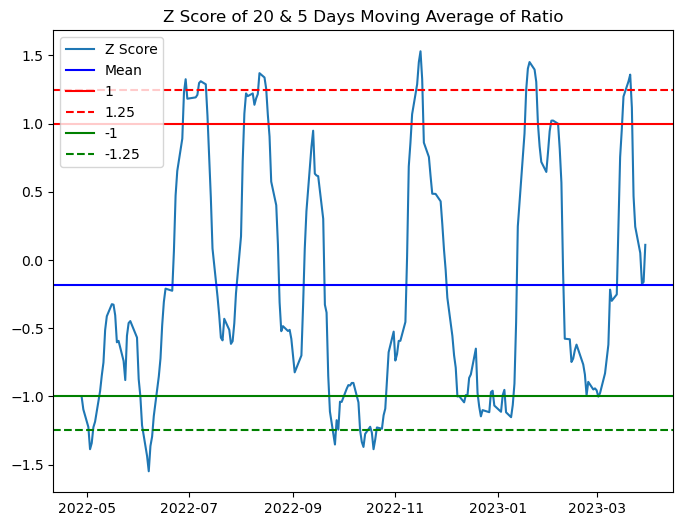

In [214]:
figure(figsize = (8, 6))
plt.plot(stock_data["Date"], stock_data["zscore_20_5"])
plt.axhline(stock_data["zscore_20_5"].mean(), color = "b")
plt.axhline(1.0, color = "r")
plt.axhline(1.25, color = "r", linestyle = "--")
plt.axhline(-1.0, color = "g")
plt.axhline(-1.25, color = "g", linestyle = "--")
plt.legend(["Z Score", "Mean", 1, 1.25, -1, -1.25])
plt.title(f"Z Score of 20 & 5 Days Moving Average of {Criterion}")
plt.show()

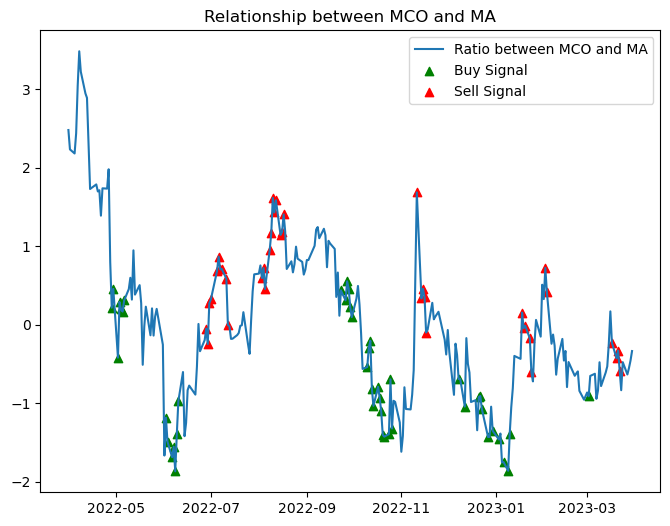

In [215]:
# Draw the Siganols
buy = stock_data.query("zscore_20_5 < -1")
sell = stock_data.query("zscore_20_5 > 1")

figure(figsize = (8, 6))
plt.plot(stock_data["Date"], stock_data[f"{Criterion}_Z"])
plt.scatter(buy["Date"], buy[f"{Criterion}_Z"], color='g', linestyle='None', marker='^')
plt.scatter(sell["Date"], sell[f"{Criterion}_Z"], color='r', linestyle='None', marker='^')
plt.legend([f"{Criterion} between {stock_1} and {stock_2}", "Buy Signal", "Sell Signal"])
plt.title(f"Relationship between {stock_1} and {stock_2}")
plt.show()